# **<span style="color:red">**Credit score classification**</span>**

## **1-Import Librairies**

In [409]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from joblib import dump, load

## **2-Import Dataset**

In [410]:
df=pd.read_excel("../Essentials_Projetfinal/Input/CreditScore.xlsx")
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",-1,7,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,_,4.0,Good,809.98,28.609352,22 Years and 1 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",5,7,6.27,4.0,Good,809.98,31.377862,22 Years and 1 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",6,7,11.27,4.0,Good,809.98,24.797347,22 Years and 1 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",8,7,9.27,4.0,Good,809.98,27.262259,22 Years and 1 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,11.27,4.0,Good,809.98,22.537593,22 Years and 1 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,11.27,4.0,Good,809.98,23.933795,22 Years and 1 Months,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,4,7.42,2.0,Good,605.03,38.550848,26 Years and 7 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


## **3-Description of Dataset**

#### a.Shape

In [411]:
df.shape

(100000, 28)

#### b.Columns

In [412]:
df.columns.to_list()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

#### c.Columns description

In [413]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [414]:

col=pd.read_excel("../Essentials_Projetfinal/Input/AboutColumns.xlsx")
col

,Column_Name,Description_English,Description_French
0,ID,Represents a unique identification of an entry,Représente une identification unique d’une entrée
1,Customer_ID,Represents a unique identification of a person,Représente une identification unique d’une personne
2,Month,Represents the month of the year,Représente le mois de l’année
3,Name,Represents the name of a person,Représente le nom d’une personne
4,Age,Represents the age of the person,Représente l’âge de la personne
5,SSN,Represents the social security number of a person,Représente le numéro de sécurité sociale d’une personne
6,Occupation,Represents the occupation of the person,Représente la profession de la personne
7,Annual_Income,Represents the annual income of the person,Représente le revenu annuel de la personne
8,Monthly_Inhand_Salary,Represents the monthly base salary of a person,Représente le salaire de base mensuel d’une personne
9,Num_Bank_Accounts,Represents the number of bank accounts a person holds,Représente le nombre de comptes bancaires qu’une personne détient


In [415]:
styled_col = col.style.set_properties(**{'text-align': 'left'})
styled_col

,Column_Name,Description_English,Description_French
0,ID,Represents a unique identification of an entry,Représente une identification unique d’une entrée
1,Customer_ID,Represents a unique identification of a person,Représente une identification unique d’une personne
2,Month,Represents the month of the year,Représente le mois de l’année
3,Name,Represents the name of a person,Représente le nom d’une personne
4,Age,Represents the age of the person,Représente l’âge de la personne
5,SSN,Represents the social security number of a person,Représente le numéro de sécurité sociale d’une personne
6,Occupation,Represents the occupation of the person,Représente la profession de la personne
7,Annual_Income,Represents the annual income of the person,Représente le revenu annuel de la personne
8,Monthly_Inhand_Salary,Represents the monthly base salary of a person,Représente le salaire de base mensuel d’une personne
9,Num_Bank_Accounts,Represents the number of bank accounts a person holds,Représente le nombre de comptes bancaires qu’une personne détient


#### d.Data exploration

In [416]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,100000,12500,CUS_0xd40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,100000,10139,Langep,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,100000,12501,#F%$D@*&8,5571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,100000,15,Lawyer,7096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000,18939,20867.67,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,100000.0,NaN,NaN,NaN,4199.880308,3188.480142,303.645417,1626.761667,3096.836667,5964.883333,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,16.99195,116.893813,-1.0,3.0,6.0,7.0,1798.0


In [417]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Nb :  After displaying a few lines of the dataset with "Head" and its description, I noticed a lot of outliers and non-conforming types to be corrected. 

For example, on line 3 of the dataset, there's an age "-500" or on line 9, an age "28_". And at the top of the occupation column is "____". And the type of the "Annual_Income" column is "object" instead of integer or float.

## **4-Data cleaning and changing of some column types**

#### a.Age

In [419]:
df["Age"].unique().tolist()

['23',
 '-500',
 '28_',
 '28',
 '34',
 '54',
 '55',
 '21',
 '31',
 '33',
 '34_',
 '7580',
 '30',
 '30_',
 '24',
 '24_',
 '44',
 '45',
 '40',
 '41',
 '32',
 '33_',
 '35',
 '35_',
 '36',
 '39',
 '37',
 '181',
 '20',
 '46',
 '26',
 '42',
 '19',
 '31_',
 '48',
 '995',
 '40_',
 '37_',
 '38',
 '54_',
 '5079',
 '43',
 '21_',
 '22',
 '6409',
 '16',
 '7080',
 '18',
 '849',
 '3885',
 '20_',
 '15',
 '27',
 '43_',
 '38_',
 '25',
 '3052',
 '14',
 '5342',
 '17',
 '18_',
 '4431',
 '2657',
 '2111_',
 '46_',
 '47',
 '1032',
 '16_',
 '19_',
 '47_',
 '456',
 '5717',
 '53_',
 '53',
 '56',
 '25_',
 '27_',
 '55_',
 '3169',
 '1191',
 '29',
 '42_',
 '7140',
 '48_',
 '49',
 '49_',
 '8233',
 '6955',
 '2534',
 '3115',
 '7657',
 '51',
 '50',
 '5112',
 '50_',
 '32_',
 '6452',
 '2744',
 '22_',
 '17_',
 '1439',
 '29_',
 '5795',
 '4872',
 '1772',
 '15_',
 '1383',
 '5657',
 '52',
 '1934',
 '51_',
 '8352',
 '3734',
 '26_',
 '2056',
 '39_',
 '7508',
 '2339',
 '14_',
 '8406',
 '1424',
 '36_',
 '6953',
 '5626',
 '4471',
 

In [420]:
df["Age"] = df["Age"].str.replace("_","")
df["Age"]= df["Age"].astype(int)
df["Age"].describe()

count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

In [421]:
#Change each Age by the median of each group of custumer_ID because of ---4808, 2263, min =-500, 1342---
df["Age"] = df.groupby(["Customer_ID"])["Age"].transform(lambda x: x.median()).round(0)

In [422]:
df["Age"]= df["Age"].astype(int)

In [423]:
# For checking
df["Age"].unique()

array([23, 28, 34, 55, 21, 31, 30, 44, 40, 33, 35, 39, 37, 20, 46, 26, 32,
       41, 48, 43, 22, 36, 16, 18, 42, 19, 27, 38, 14, 25, 45, 47, 17, 53,
       24, 54, 29, 15, 49, 51, 50, 52, 56])

In [424]:
#For checking
df["Age"].describe()

count    100000.000000
mean         33.314000
std          10.765972
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

#### b.Annual Income

In [425]:
df["Annual_Income"].unique().tolist()

['19114.12',
 '34847.84',
 '34847.84_',
 '143162.64',
 '30689.89',
 '30689.89_',
 '35547.71_',
 '35547.71',
 '73928.46',
 '131313.4',
 '10909427.0',
 '34081.38_',
 '34081.38',
 '114838.41',
 '114838.41_',
 '31370.8',
 '33751.27',
 '88640.24',
 '88640.24_',
 '54392.16',
 '54392.16_',
 '8701.545',
 '8701.545_',
 '25546.26',
 '25546.26_',
 '31993.78',
 '92047.08',
 '92047.08_',
 '32284.62',
 '97791.42',
 '97791.42_',
 '19300.34',
 '19514.88',
 '10183.015',
 '10183.015_',
 '106733.13',
 '106733.13_',
 '12600.445',
 '12600.445_',
 '57983.12',
 '57983.12_',
 '20787.69',
 '34290.12',
 '34290.12_',
 '43070.24',
 '43070.24_',
 '28572.39',
 '6515990.0_',
 '39641.54',
 '39641.54_',
 '20186.02',
 '586359.0',
 '18627.64',
 '12986.745',
 '58317.0',
 '42171.98',
 '71681.4',
 '29469.98',
 '29469.98_',
 '72559.36',
 '15566.02',
 '15566.02_',
 '66567.32',
 '12909.895',
 '30788.44',
 '20574.47',
 '20574.47_',
 '148699.32',
 '148699.32_',
 '85554.03',
 '55829.79',
 '18334118.0',
 '19717385.0',
 '14165.23'

In [426]:
df["Annual_Income"] = df["Annual_Income"].str.replace("_","")
df["Annual_Income"] = df["Annual_Income"].astype(float)

In [427]:
df["Annual_Income"] = df.groupby(["Customer_ID"])["Annual_Income"].transform(lambda x: x.median())

In [428]:
df["Annual_Income"].describe()

count    100000.000000
mean      50505.123449
std       38299.422093
min        7005.930000
25%       19342.972500
50%       36999.705000
75%       71683.470000
max      179987.280000
Name: Annual_Income, dtype: float64

#### c.Number bank accounts

In [429]:
df["Num_Bank_Accounts"].describe()

count    100000.000000
mean         16.991950
std         116.893813
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [430]:
#Because of the "describe" function on this column, with a maximum number of bank account at 1798, something is wrong. So I recalculate the column
df["Num_Bank_Accounts"] = df.groupby(["Customer_ID"])["Num_Bank_Accounts"].transform(lambda x: x.median()).round(0)

#### d.Other processing

    Number of credit card

In [431]:
df["Num_Credit_Card"].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [432]:
df["Num_Credit_Card"] = df.groupby(["Customer_ID"])["Num_Credit_Card"].transform(lambda x: x.median())

In [433]:
df["Num_Credit_Card"].describe()

count    100000.000000
mean          5.534640
std           2.066834
min           0.500000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64

    Interest rate

In [434]:
df["Interest_Rate"].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

In [435]:
df["Interest_Rate"] = df.groupby(["Customer_ID"])["Interest_Rate"].transform(lambda x: x.median())

In [436]:
df["Interest_Rate"].describe()

count    100000.00000
mean         14.53208
std           8.74133
min           1.00000
25%           7.00000
50%          13.00000
75%          20.00000
max          34.00000
Name: Interest_Rate, dtype: float64

    Number of Loan

In [437]:
df["Num_of_Loan"] = df["Num_of_Loan"].str.replace("_","")
df["Num_of_Loan"] = df["Num_of_Loan"].astype(int)
df["Num_of_Loan"].describe()

count    100000.000000
mean          3.009960
std          62.647879
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

In [438]:
#Because of the "describe" function on this column, with a minimum value at -100 number of loan, something is wrong. So I recalculate the column
df["Num_of_Loan"] = df.groupby(["Customer_ID"])["Num_of_Loan"].transform(lambda x: x.median()).round(0)

In [439]:
#For checking
df["Num_of_Loan"].describe()

count    100000.000000
mean          3.532880
std           2.446356
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: Num_of_Loan, dtype: float64

    Number of delayed payment

In [440]:
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].str.replace("_","")
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(float)

    Percent of changed Credit Limit

In [441]:
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].str.replace("_","0")
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype(float)
df["Changed_Credit_Limit"].describe()

count    100000.000000
mean         10.171791
std           6.880628
min          -6.490000
25%           4.970000
50%           9.250000
75%          14.660000
max          36.970000
Name: Changed_Credit_Limit, dtype: float64

    Outstanding debt

In [442]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].str.replace("_","")
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(float)
df["Outstanding_Debt"].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

    Payment of minimum amount

In [443]:
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].str.replace("NM","No")
df["Payment_of_Min_Amount"].unique()

array(['No', 'Yes'], dtype=object)

    Amount invested monthly

In [444]:
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(float)
df["Amount_invested_monthly"].describe()

count    91216.000000
mean       195.539456
std        199.564527
min          0.000000
25%         72.236692
50%        128.954538
75%        236.815814
max       1977.326102
Name: Amount_invested_monthly, dtype: float64

    Monthly balance

In [445]:
df["Monthly_Balance"] = df["Monthly_Balance"].astype(float).round(2)

In [446]:
df["Monthly_Balance"].describe()

count    98791.000000
mean       402.551261
std        213.925513
min          0.010000
25%        270.110000
50%        336.730000
75%        470.265000
max       1602.040000
Name: Monthly_Balance, dtype: float64

    Occupation

In [447]:
df["Occupation"].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

    Credit_Mix

In [448]:
df["Credit_Mix"].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

    Paiement of minimum amount

In [449]:
df["Payment_of_Min_Amount"].unique()

array(['No', 'Yes'], dtype=object)

    Info function after preprocessing

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

## **5-Handle missing Values**

#### a.Identifying missing values

In [451]:
df.isna().sum() / len(df)*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         0.000
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary        0.000
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       0.000
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         0.000
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      8.784
Payment_Behaviour            0.000
Monthly_Balance              1.209
Credit_Score                 0.000
dtype: float64

In [452]:
# Resume columns with missing values
columns_na= df[["Type_of_Loan", "Amount_invested_monthly", "Monthly_Balance" ]]
columns_na.isna().sum().reset_index()

,index,0
0,Type_of_Loan,11408
1,Amount_invested_monthly,8784
2,Monthly_Balance,1209


#### b.Replacing missing values

    Amount invested monthly

In [453]:
df["Amount_invested_monthly"].describe()

count    91216.000000
mean       195.539456
std        199.564527
min          0.000000
25%         72.236692
50%        128.954538
75%        236.815814
max       1977.326102
Name: Amount_invested_monthly, dtype: float64

In [454]:
df["Amount_invested_monthly"] = df.groupby('Customer_ID')["Amount_invested_monthly"].transform(lambda x: x.fillna(x.median()))

    Monthly balance

In [455]:
df["Monthly_Balance"].unique()

array([312.49, 284.63, 331.21, ..., 189.64, 410.26, 479.87])

In [456]:
df["Monthly_Balance"] = df.groupby('Customer_ID')["Monthly_Balance"].transform(lambda x: x.fillna(x.median()))

    Checking

In [457]:
columns_na= df[["Type_of_Loan", "Amount_invested_monthly", "Monthly_Balance" ]]
columns_na.isna().sum().reset_index()

,index,0
0,Type_of_Loan,11408
1,Amount_invested_monthly,0
2,Monthly_Balance,0


Nb: I won't use the "type of loan" column, so I won't fill the missing values

    Extraction of the clean dataset

In [458]:
df.to_csv('output\df_cleaned.csv', index=False)

## **6-Selecting features**

    Import of the cleaning dataset

In [459]:
df1 =pd.read_csv("../Essentials_Projetfinal/Output/df_cleaned.csv")
df1.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7.0,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.49,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",-1,7.0,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.63,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7.0,0.00,4.0,Good,809.98,28.609352,22 Years and 1 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.21,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",5,7.0,6.27,4.0,Good,809.98,31.377862,22 Years and 1 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",6,7.0,11.27,4.0,Good,809.98,24.797347,22 Years and 1 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.49,Good


#### a.Encoding of categorical variables

    Label Encoding for "Occupation"

In [460]:
df1["Occupation"].value_counts().sort_values()

Occupation
Writer           6304
Musician         6352
Manager          6432
Journalist       6536
Doctor           6568
Entrepreneur     6648
Teacher          6672
Developer        6720
Media_Manager    6720
Scientist        6744
Accountant       6744
Mechanic         6776
Architect        6824
Engineer         6864
Lawyer           7096
Name: count, dtype: int64

In [461]:
occupation = LabelEncoder()
df1['Occup_encoded'] = occupation.fit_transform(df1['Occupation'])
df1['Occup_encoded'].value_counts().sort_values()

Occup_encoded
14    6304
11    6352
8     6432
6     6536
3     6568
5     6648
13    6672
2     6720
10    6720
12    6744
0     6744
9     6776
1     6824
4     6864
7     7096
Name: count, dtype: int64

    Ordinal Encoding for "Credit Mix"

In [462]:
df1["Credit_Mix"].value_counts().sort_values()

Credit_Mix
Bad         23768
Good        30384
Standard    45848
Name: count, dtype: int64

In [463]:
order = {'Bad': 0, 'Standard': 1, 'Good': 2}
df1["CredMix_encoded"] = df1["Credit_Mix"].map(order)
df1["CredMix_encoded"].value_counts().sort_values()

CredMix_encoded
0    23768
2    30384
1    45848
Name: count, dtype: int64

    Label Encoding for "Paiement of minimum amount"

In [464]:
df1["Payment_of_Min_Amount"].value_counts().sort_values()

Payment_of_Min_Amount
No     47674
Yes    52326
Name: count, dtype: int64

In [465]:
payment = LabelEncoder()
df1['Payment_encoded'] = payment.fit_transform(df1["Payment_of_Min_Amount"])
df1['Payment_encoded'].value_counts().sort_values()

Payment_encoded
0    47674
1    52326
Name: count, dtype: int64

    Ordinal Encoding for "Credit score"

In [466]:
df1["Credit_Score"].value_counts().sort_values()

Credit_Score
Good        17828
Poor        28998
Standard    53174
Name: count, dtype: int64

In [467]:
scoring = {'Poor': 0, 'Standard': 1, 'Good': 2}
df1["Scoring_encoded"] = df1["Credit_Score"].map(scoring)
df1["Scoring_encoded"] .value_counts().sort_values()

Scoring_encoded
2    17828
0    28998
1    53174
Name: count, dtype: int64

In [468]:
df1.columns.tolist()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score',
 'Occup_encoded',
 'CredMix_encoded',
 'Payment_encoded',
 'Scoring_encoded']

#### b.Correlation matrix

In [469]:
df2 = df1[[
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Occup_encoded',
 'CredMix_encoded',
 'Payment_encoded',
 'Scoring_encoded']]

In [470]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.314000,10.765972,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,100000.0,4199.880308,3188.480142,303.645417,1626.761667,3096.836667,5964.883333,15204.633333
Num_Bank_Accounts,100000.0,5.369200,2.593438,-1.000000,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,100000.0,5.534640,2.066834,0.500000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880,2.446356,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,30.747920,226.173639,-3.000000,9.000000,14.000000,18.000000,4388.000000
Changed_Credit_Limit,100000.0,10.171791,6.880628,-6.490000,4.970000,9.250000,14.660000,36.970000


In [471]:
corr_df2 = df2.corr(method="pearson").round(2)
corr_df2

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occup_encoded,CredMix_encoded,Payment_encoded,Scoring_encoded
Age,1.00,0.09,0.09,-0.19,-0.15,-0.22,-0.21,-0.17,0.00,-0.15,0.00,-0.20,0.03,0.00,0.06,0.12,-0.00,0.24,-0.23,0.16
Annual_Income,0.09,1.00,1.00,-0.28,-0.22,-0.30,-0.26,-0.25,-0.00,-0.17,-0.01,-0.27,0.18,0.01,0.63,0.71,0.00,0.34,-0.27,0.21
Monthly_Inhand_Salary,0.09,1.00,1.00,-0.28,-0.22,-0.30,-0.25,-0.25,-0.00,-0.17,-0.01,-0.27,0.18,0.01,0.63,0.71,0.00,0.34,-0.27,0.21
Num_Bank_Accounts,-0.19,-0.28,-0.28,1.00,0.44,0.58,0.47,0.56,0.01,0.32,0.01,0.51,-0.07,-0.01,-0.18,-0.30,0.01,-0.72,0.51,-0.39
Num_Credit_Card,-0.15,-0.22,-0.22,0.44,1.00,0.50,0.42,0.48,0.01,0.24,0.02,0.49,-0.06,-0.01,-0.14,-0.24,0.00,-0.54,0.36,-0.40
Interest_Rate,-0.22,-0.30,-0.30,0.58,0.50,1.00,0.56,0.59,0.00,0.35,0.00,0.63,-0.08,-0.01,-0.19,-0.33,0.00,-0.75,0.55,-0.49
Num_of_Loan,-0.21,-0.26,-0.25,0.47,0.42,0.56,1.00,0.50,0.01,0.36,0.01,0.64,-0.10,-0.00,-0.16,-0.43,-0.01,-0.64,0.45,-0.36
Delay_from_due_date,-0.17,-0.25,-0.25,0.56,0.48,0.59,0.50,1.00,0.01,0.28,-0.01,0.57,-0.06,-0.00,-0.16,-0.28,0.01,-0.69,0.44,-0.43
Num_of_Delayed_Payment,0.00,-0.00,-0.00,0.01,0.01,0.00,0.01,0.01,1.00,-0.00,0.01,0.01,0.00,0.00,-0.00,-0.01,0.02,-0.02,0.01,-0.01
Changed_Credit_Limit,-0.15,-0.17,-0.17,0.32,0.24,0.35,0.36,0.28,-0.00,1.00,0.00,0.44,-0.05,-0.00,-0.11,-0.20,-0.00,-0.41,0.42,-0.16


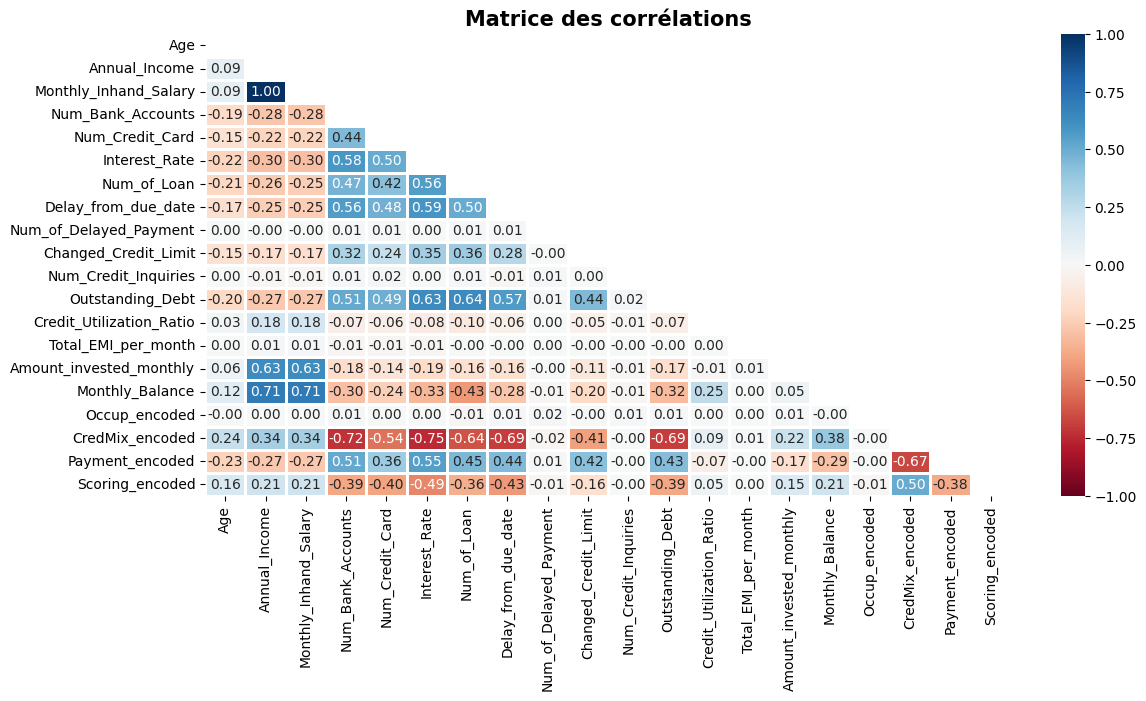

In [472]:
plt.figure(figsize=(13,6))
mask = np.triu(np.ones_like(corr_df2, dtype=bool))
sns.heatmap(corr_df2, mask=mask, center=0, cmap='RdBu', 
            linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Matrice des corrélations', fontsize = 15, fontweight='bold')
plt.show()

    Features selection

Considering moderate (>|0.3|) and strong (>|0.5|) correlation thresholds with the scoring_encoded target variable, the features are:

1 = Interest_Rate (-0.49)

2 = CredMix_encoded (0.50)

3 = Delay_from_due_date (-0.43)

4 = Num_Bank_Accounts (-0.39)

5 = Outstanding_Debt (-0.39)

6 = Payment_encoded (-0.38)

7 = Num_Credit_Card (-0.40)

8 = Num_of_Loan (-0.36)

In conclusion, using the correlation matrix, I was able to identify the features with a significant relationship to the target variable. 

This allows me to simplify the model by eliminating less relevant features, which can improve model performance and interpretability.

Nb : To confirm my choice of features, I'll use the Recursive Feature Elimination (RFE) method.

#### c.Recursive Feature Elimination(RFE)

In [473]:
df2.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occup_encoded,CredMix_encoded,Payment_encoded,Scoring_encoded
0,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.49,12,2,0,2
1,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1,7.0,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.63,12,2,0,2
2,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,0.00,4.0,809.98,28.609352,49.574949,81.699521,331.21,12,2,0,2
3,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,7.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.45,12,2,0,2
4,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,7.0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.49,12,2,0,2


    Define features and target variable

In [474]:
X = df2.drop(columns=['Scoring_encoded']) #Features
y = df2['Scoring_encoded'] #Target variable
X , y

(       Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
 0       23       19114.12            1824.843333                3.0   
 1       23       19114.12            1824.843333                3.0   
 2       23       19114.12            1824.843333                3.0   
 3       23       19114.12            1824.843333                3.0   
 4       23       19114.12            1824.843333                3.0   
 ...    ...            ...                    ...                ...   
 99995   25       39628.99            3359.415833                4.0   
 99996   25       39628.99            3359.415833                4.0   
 99997   25       39628.99            3359.415833                4.0   
 99998   25       39628.99            3359.415833                4.0   
 99999   25       39628.99            3359.415833                4.0   
 
        Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
 0                  4.0            3.0          4.0       

    Split data into training and test sets

In [475]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [476]:
X_train.shape

(80000, 19)

In [477]:
X_test.shape 

(20000, 19)

In [478]:
y_train.shape 

(80000,)

In [479]:
y_test.shape

(20000,)

    Instantiating the RandomForestClassifier model

In [480]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

    Instantiate RFE with the model

In [481]:
rfe = RFE(estimator=model, n_features_to_select=8)

    Adapt RFE to data

In [482]:
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=8)

    Selected features

In [483]:
selected_features = X.columns[rfe.support_]
selected_features.tolist()

['Monthly_Inhand_Salary',
 'Interest_Rate',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'CredMix_encoded']

Based on the recursive feature elimination, the 8 selected are :

1 = Monthly_Inhand_Salary

2 = Interest_Rate

3 = Delay_from_due_date

4 = Changed_Credit_Limit

5 = Outstanding_Debt

6 = Amount_invested_monthly

7 = Monthly_Balance

8 = CredMix_encoded

Nb : The comparison between the features of the RFE method and those initially chosen with the correlation matrix, do not all match. 

Only 4 are similar. So I'm going to use Dataiku's feature importance to finalize the choice.

#### d.Dataiku's feature importance and feature effects

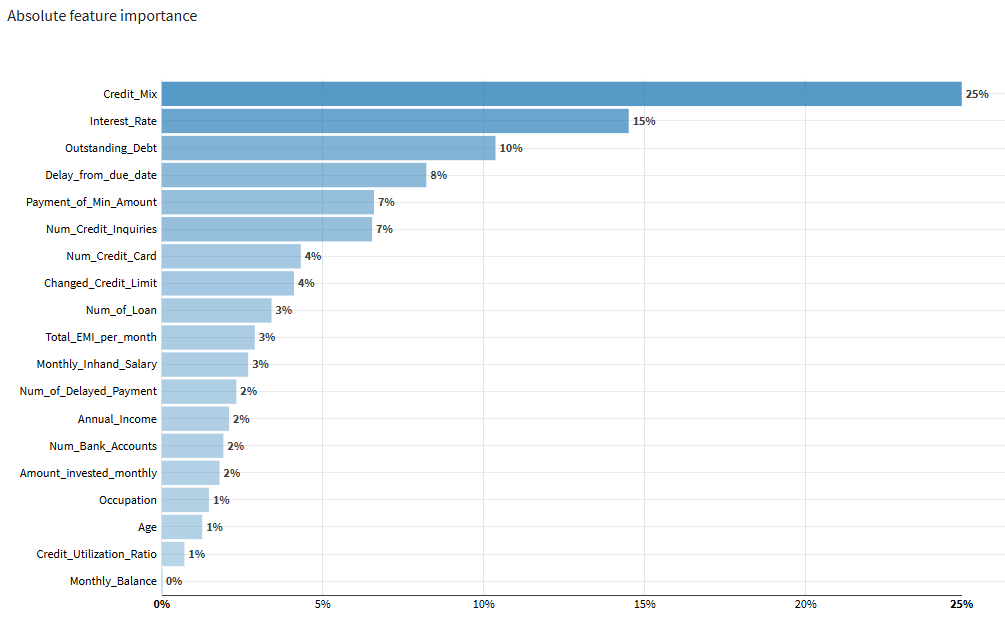

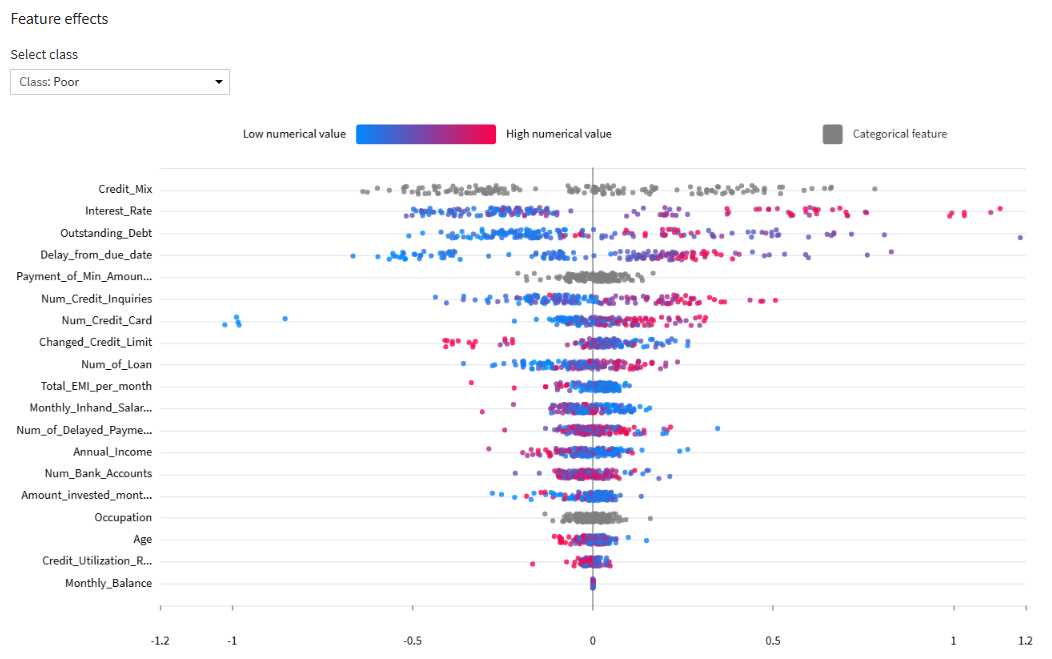

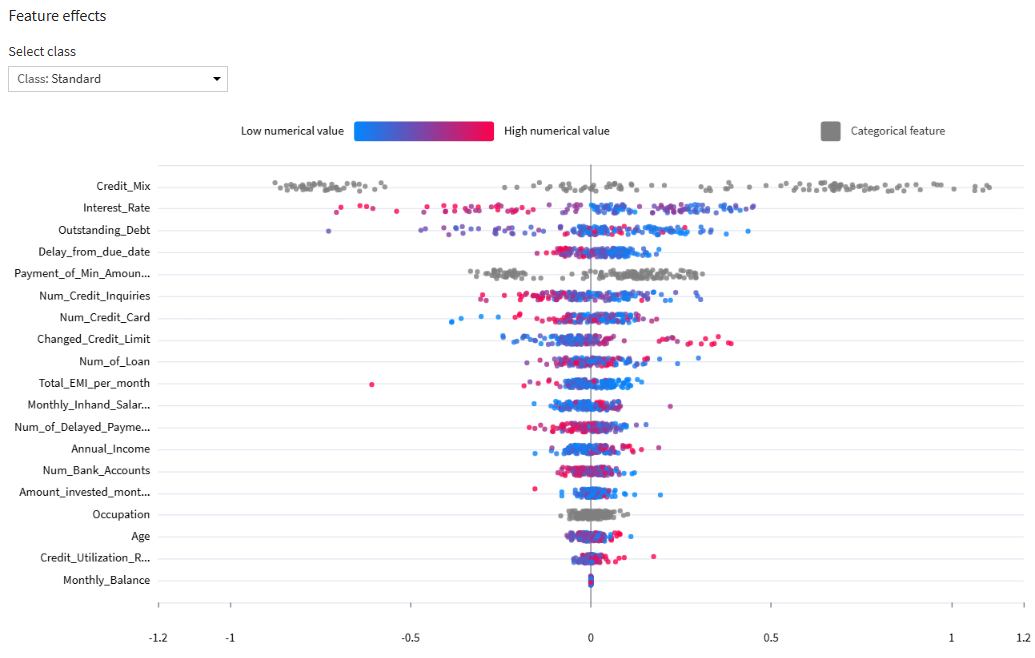

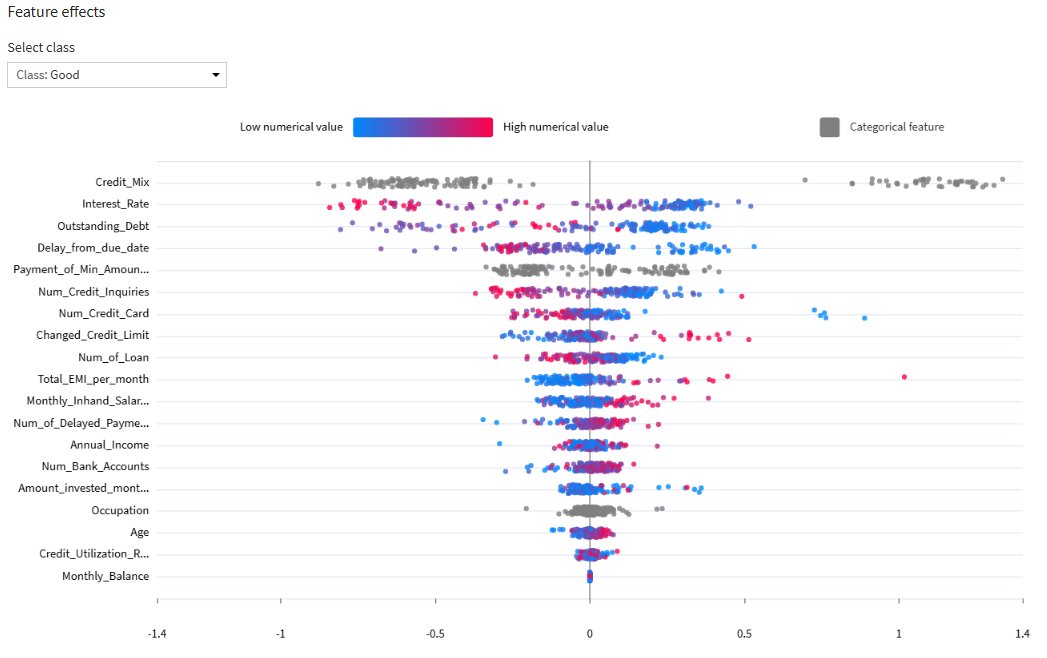

Based on the dataiku's feature importance, the first 8 selected are :

1 = Credit_Mix

2 = Interest_Rate

3 = Outstanding_Debt

4 = Delay_from_due_date

5 = Payment_of_Minimum_Amount

6 = Num_Credit_Inquiries

7 = Num_Credit_Card

8 = Changed_Credit_Limit

Nb : Considering the 3 feature selection methods, only 7 features are common. Therefore, for our credit scoring prediction, we will use 7 relevant features : 

1 = Credit_Mix

2 = Interest_Rate

3 = Outstanding_Debt

4 = Delay_from_due_date

5 = Payment_of_Minimum_Amount

6 = Num_Credit_Card

7 = Changed_Credit_Limit


## **7.Visualization on selected features**

In [484]:
dfv = df[[
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Credit_Score']]
dfv.head()

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,4.0,3.0,3,11.27,809.98,Good,No,Good
1,4.0,3.0,-1,11.27,809.98,Good,No,Good
2,4.0,3.0,3,0.00,809.98,Good,No,Good
3,4.0,3.0,5,6.27,809.98,Good,No,Good
4,4.0,3.0,6,11.27,809.98,Good,No,Good


In [485]:
dfv.to_csv('output\dfdataiku.csv', index=False)

#### a.Features distribution by target

    Distribution of Credit Mix

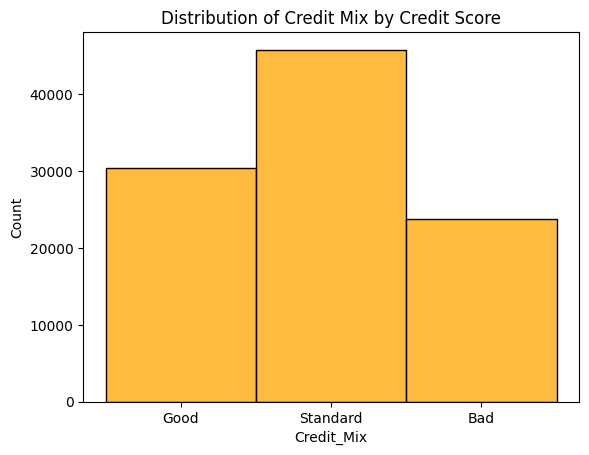

In [486]:
sns.histplot(data=dfv, x='Credit_Mix', color = 'orange')
plt.title('Distribution of Credit Mix by Credit Score')
plt.show()

    Interest Rate Distribution by Credit Score

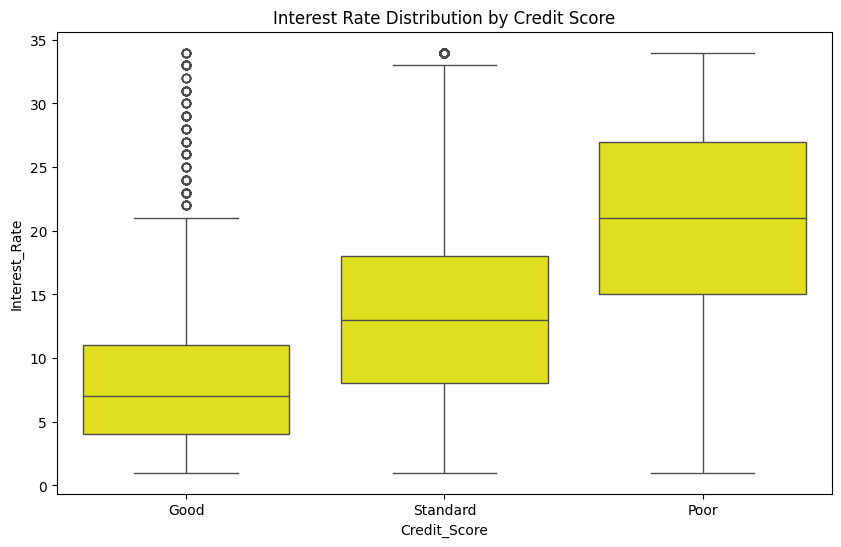

In [487]:
# Interest Rate Distribution by Credit Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfv, x='Credit_Score', y='Interest_Rate', color= 'yellow')
plt.title('Interest Rate Distribution by Credit Score')
plt.show()

    Outstanding Debt Distribution by Credit Score

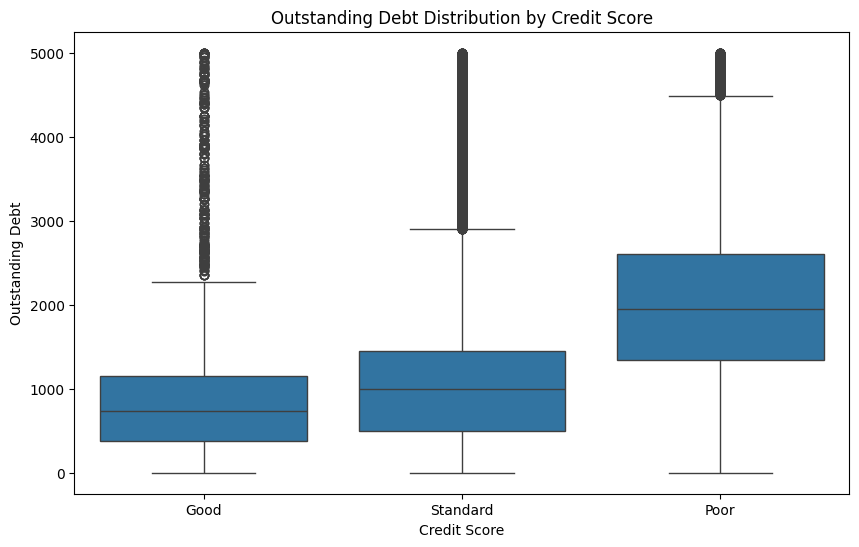

In [488]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=dfv, x='Credit_Score', y='Outstanding_Debt')
plt.title('Outstanding Debt Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Outstanding Debt')
plt.show()

    Delay from Due Date Distribution by Credit Score

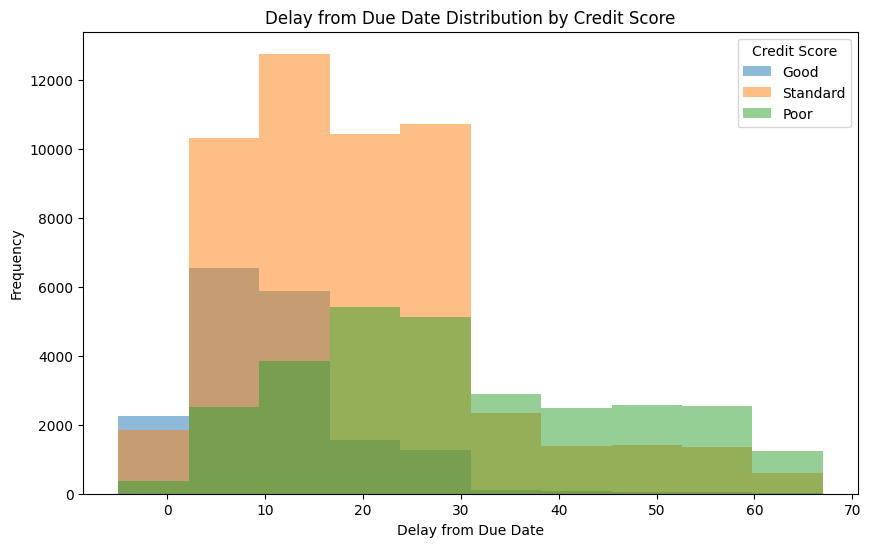

In [489]:
plt.figure(figsize=(10, 6))
for score in dfv['Credit_Score'].unique():
    subset = dfv[dfv['Credit_Score'] == score]
    plt.hist(subset['Delay_from_due_date'], alpha=0.5, label=str(score))

plt.title('Delay from Due Date Distribution by Credit Score')
plt.xlabel('Delay from Due Date')
plt.ylabel('Frequency')
plt.legend(title='Credit Score')
plt.show()

    Frequency of Payment of Minimum Amount by Credit Score

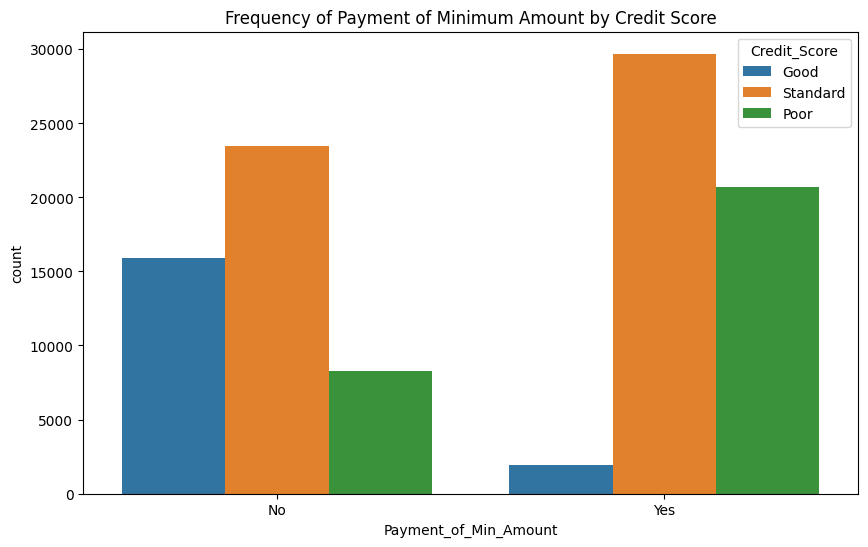

In [490]:
# Frequency of Payment of Minimum Amount by Credit Score
plt.figure(figsize=(10, 6))
sns.countplot(data=dfv, x='Payment_of_Min_Amount', hue='Credit_Score')
plt.title('Frequency of Payment of Minimum Amount by Credit Score')
plt.show()

    Number of Credit Cards Distribution by Credit Score

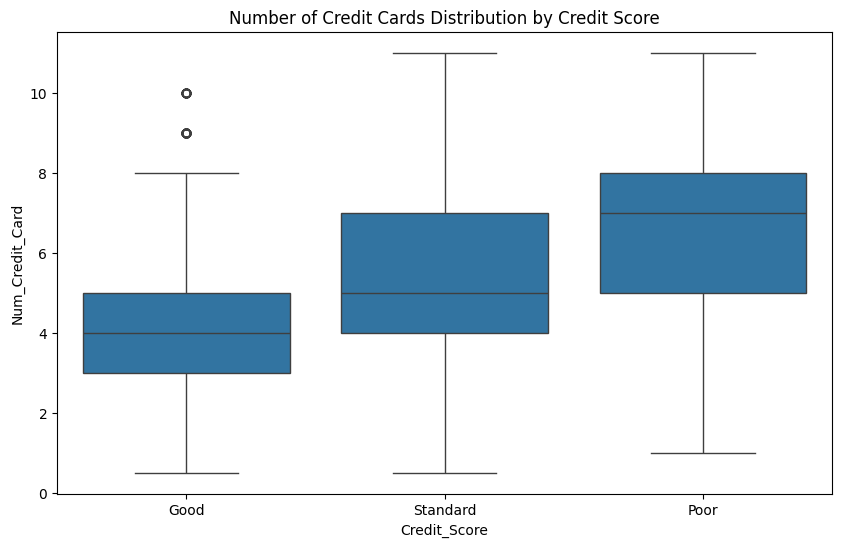

In [491]:
# Number of Credit Cards Distribution by Credit Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfv, x='Credit_Score', y='Num_Credit_Card')
plt.title('Number of Credit Cards Distribution by Credit Score')
plt.show()

#### b.Pair Plot of Key Variables by Credit Score

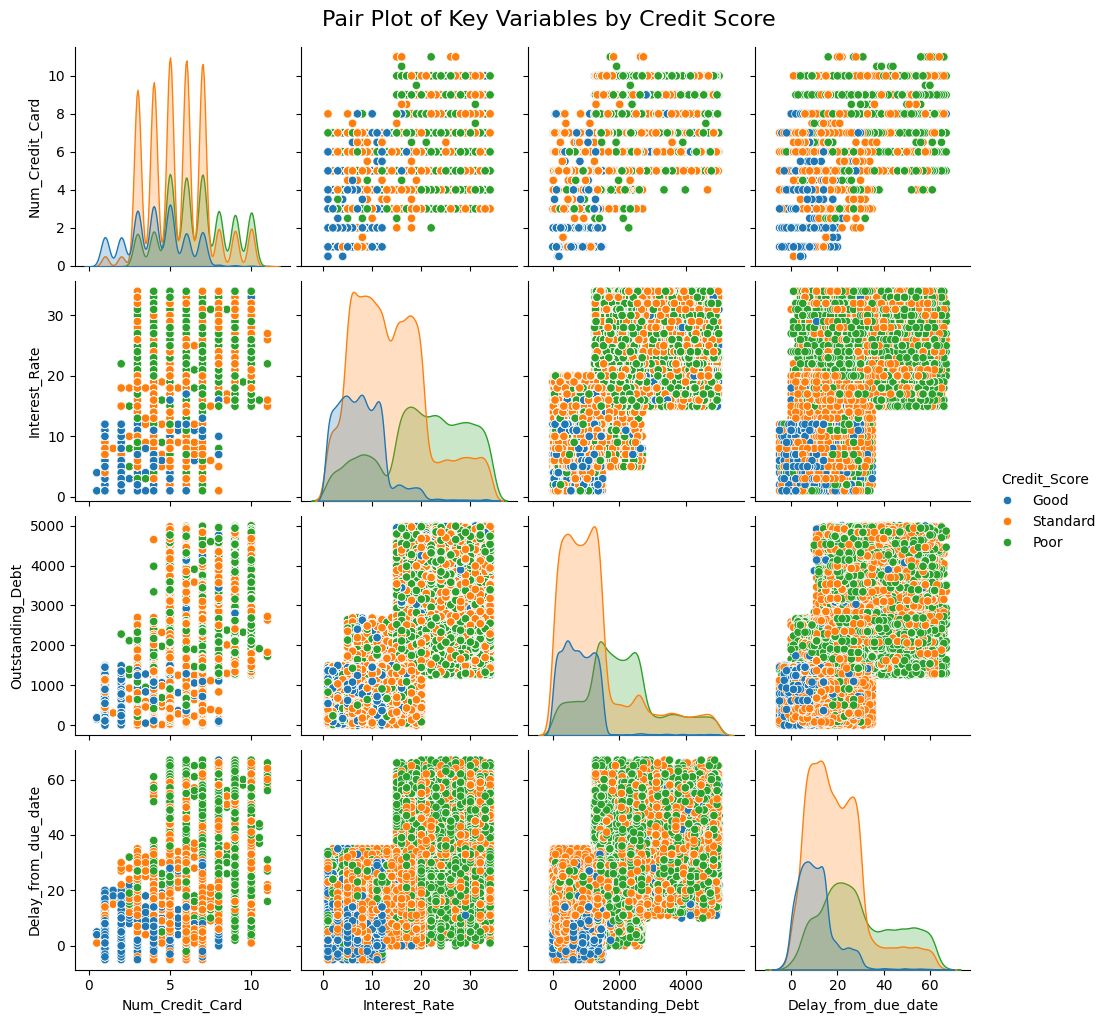

In [542]:
sns.pairplot(dfv, hue='Credit_Score', vars=['Num_Credit_Card','Interest_Rate', 'Outstanding_Debt', 'Delay_from_due_date'])
plt.suptitle('Pair Plot of Key Variables by Credit Score', y=1.02, fontsize=16)
plt.show()

## **8-Training and evaluation of prediction models**

In [493]:
df.columns.tolist()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

#### a.Define features and target variable

In [494]:
df3 = df1[[
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'CredMix_encoded',
 'Payment_encoded',
 'Scoring_encoded']]
df3.head()

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,CredMix_encoded,Payment_encoded,Scoring_encoded
0,4.0,3.0,3,11.27,809.98,2,0,2
1,4.0,3.0,-1,11.27,809.98,2,0,2
2,4.0,3.0,3,0.00,809.98,2,0,2
3,4.0,3.0,5,6.27,809.98,2,0,2
4,4.0,3.0,6,11.27,809.98,2,0,2


In [495]:
y = df3['Scoring_encoded']
X = df3.drop('Scoring_encoded', axis=1)
X,y

(       Num_Credit_Card  Interest_Rate  Delay_from_due_date  \
 0                  4.0            3.0                    3   
 1                  4.0            3.0                   -1   
 2                  4.0            3.0                    3   
 3                  4.0            3.0                    5   
 4                  4.0            3.0                    6   
 ...                ...            ...                  ...   
 99995              6.0            7.0                   23   
 99996              6.0            7.0                   18   
 99997              6.0            7.0                   27   
 99998              6.0            7.0                   20   
 99999              6.0            7.0                   18   
 
        Changed_Credit_Limit  Outstanding_Debt  CredMix_encoded  \
 0                     11.27            809.98                2   
 1                     11.27            809.98                2   
 2                      0.00            8

    Standardization

In [496]:
numeric_columns = ['Num_Credit_Card', 'Interest_Rate' , 'Delay_from_due_date' , 'Changed_Credit_Limit' , 'Outstanding_Debt']

In [497]:
X[numeric_columns]

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt
0,4.0,3.0,3,11.27,809.98
1,4.0,3.0,-1,11.27,809.98
2,4.0,3.0,3,0.00,809.98
3,4.0,3.0,5,6.27,809.98
4,4.0,3.0,6,11.27,809.98
...,...,...,...,...,...
99995,6.0,7.0,23,11.50,502.38
99996,6.0,7.0,18,11.50,502.38
99997,6.0,7.0,27,11.50,502.38
99998,6.0,7.0,20,11.50,502.38


In [498]:
categorial_columns = ['CredMix_encoded', 'Payment_encoded']

In [499]:
X[categorial_columns]

,CredMix_encoded,Payment_encoded
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
...,...,...
99995,2,0
99996,2,0
99997,2,0
99998,2,0


In [500]:
scaler = StandardScaler()

In [501]:
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
X[numeric_columns]

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt
0,-0.742511,-1.319266,-1.215932,0.159610,-0.533485
1,-0.742511,-1.319266,-1.485110,0.159610,-0.533485
2,-0.742511,-1.319266,-1.215932,-1.478330,-0.533485
3,-0.742511,-1.319266,-1.081342,-0.567072,-0.533485
4,-0.742511,-1.319266,-1.014048,0.159610,-0.533485
...,...,...,...,...,...
99995,0.225157,-0.861667,0.129961,0.193037,-0.799776
99996,0.225157,-0.861667,-0.206512,0.193037,-0.799776
99997,0.225157,-0.861667,0.399139,0.193037,-0.799776
99998,0.225157,-0.861667,-0.071923,0.193037,-0.799776


In [502]:
X_final = pd.concat([X[numeric_columns], X[categorial_columns]], axis=1)
X_final

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,CredMix_encoded,Payment_encoded
0,-0.742511,-1.319266,-1.215932,0.159610,-0.533485,2,0
1,-0.742511,-1.319266,-1.485110,0.159610,-0.533485,2,0
2,-0.742511,-1.319266,-1.215932,-1.478330,-0.533485,2,0
3,-0.742511,-1.319266,-1.081342,-0.567072,-0.533485,2,0
4,-0.742511,-1.319266,-1.014048,0.159610,-0.533485,2,0
...,...,...,...,...,...,...,...
99995,0.225157,-0.861667,0.129961,0.193037,-0.799776,2,0
99996,0.225157,-0.861667,-0.206512,0.193037,-0.799776,2,0
99997,0.225157,-0.861667,0.399139,0.193037,-0.799776,2,0
99998,0.225157,-0.861667,-0.071923,0.193037,-0.799776,2,0


    Split data into training and test sets

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [504]:
X_train.shape , y_train.shape

((80000, 7), (80000,))

In [505]:
X_train

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,CredMix_encoded,Payment_encoded
75220,-1.226346,-1.433665,-0.475691,-0.756009,-0.316122,2,0
48955,-2.194014,-0.518468,-0.610280,-0.571432,-0.608870,2,0
44966,0.708991,-0.747268,0.466434,-1.209458,-0.841079,1,0
13568,0.708991,-0.632868,-0.341102,0.155250,-1.089624,1,0
92727,-1.226346,-0.632868,-1.283226,-0.033688,-0.601512,2,0
...,...,...,...,...,...,...,...
6265,-0.258677,-1.319266,-0.610280,-0.671714,-1.142207,2,0
54886,2.160494,0.167930,2.687156,0.480803,-0.119156,1,1
76820,0.225157,0.625528,-0.879459,-0.873731,-0.713898,1,0
860,0.708991,-1.319266,-0.610280,-0.911519,-0.941121,2,0


In [506]:
X_test.shape , y_test.shape

((20000, 7), (20000,))

In [507]:
X_test

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,CredMix_encoded,Payment_encoded
75721,-0.258677,-0.518468,-0.812164,0.079675,0.036411,2,0
80184,0.708991,0.396729,-0.206512,1.705988,2.892029,0,1
19864,-1.710180,-0.404069,-1.215932,-0.923146,-0.200126,2,0
76699,0.225157,1.998324,-0.408396,0.033167,0.968191,1,1
92991,-1.710180,-0.289669,-1.350521,-0.062755,-0.534324,2,0
...,...,...,...,...,...,...,...
32595,0.708991,-0.747268,-0.610280,0.863037,0.855424,1,1
29313,-1.226346,-0.632868,-0.879459,-0.362148,-0.887317,1,1
37862,-1.226346,-0.060870,-0.542985,0.309306,-0.182855,1,1
53421,-0.742511,-0.060870,-1.148637,-0.440629,-0.906181,1,0


#### b.Logistic regression

    Training of model on the train set

In [508]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

    Prediction on the test set

In [509]:
# Predictions on training set
y_pred = classifier.predict(X_test)
print(y_pred[0:20])

[2 1 2 0 2 0 2 1 1 1 1 0 0 2 0 1 1 0 1 1]


#### c.Logistic regression evaluation

    Accuracy

In [510]:
accuracy_log_reg = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')

Logistic Regression Accuracy: 0.6465


    Confusion Matrix

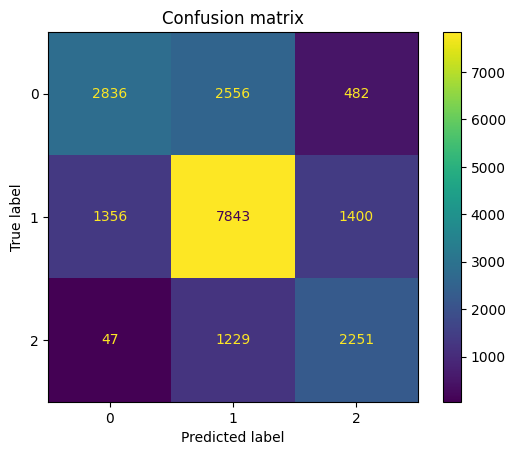

'Poor': 0, 'Standard': 1, 'Good': 2


In [511]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
cm_display.ax_.set_title("Confusion matrix") # Simply to set a title
plt.show() # Show graph
print("'Poor': 0, 'Standard': 1, 'Good': 2")

    Précision, Rappel, Score F1

In [512]:
precision_log_reg = precision_score(y_test, y_pred, average=None)
recall_log_reg = recall_score(y_test, y_pred, average=None)
f1_log_reg = f1_score(y_test, y_pred, average=None)

print(f'Logistic Regression Precision: {precision_log_reg}')
print(f'Logistic Regression Recall: {recall_log_reg}')
print(f'Logistic Regression F1 Score: {f1_log_reg}')

Logistic Regression Precision: [0.66902571 0.6744926  0.5446407 ]
Logistic Regression Recall: [0.48280558 0.73997547 0.63821945]
Logistic Regression F1 Score: [0.56086226 0.70571827 0.58772846]


#### d.Build Random Forest

    Training model

In [513]:
RFclassifier = RandomForestClassifier(n_estimators = 100)
RFclassifier.fit(X_train, y_train)


RandomForestClassifier()

    Prediction

In [514]:
y_RFpred = RFclassifier.predict(X_test)
print(y_RFpred)

[2 0 1 ... 1 1 0]


#### e.Evaluation on Random Forest method

    Accuracy

In [515]:
accuracy_RF = accuracy_score(y_test, y_RFpred)
print(f'Random Forest Accuracy: {accuracy_RF}')

Random Forest Accuracy: 0.77065


    Confusion matrix

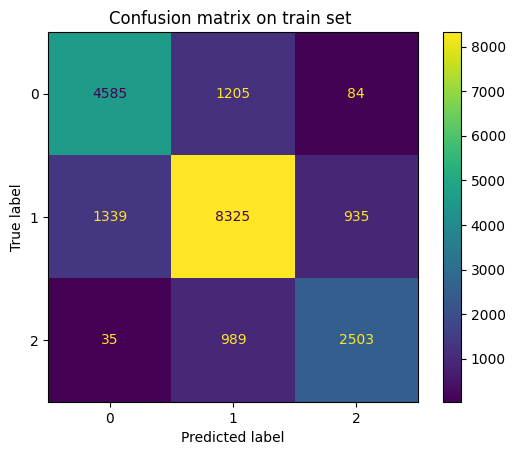

'Poor': 0, 'Standard': 1, 'Good': 2


In [516]:
cm = confusion_matrix(y_test, y_RFpred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_RFpred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("'Poor': 0, 'Standard': 1, 'Good': 2")

    Précision, Rappel, Score F1

In [517]:
precision_rf = precision_score(y_test, y_RFpred,average=None)
recall_rf = recall_score(y_test, y_RFpred,average=None)
f1_rf = f1_score(y_test, y_RFpred,average=None)

print(f'Random Forest Precision: {precision_rf}')
print(f'Random Forest Recall: {recall_rf}')
print(f'Random Forest F1 Score: {f1_rf}')

Random Forest Precision: [0.7694244  0.79142504 0.71067575]
Random Forest Recall: [0.78055839 0.78545146 0.70966827]
Random Forest F1 Score: [0.77495141 0.78842693 0.71017166]


## **9-Prediction**

#### a.Saving ang loading model

    Save the model to disk

In [518]:
dump(RFclassifier, 'random_forest_model.joblib')

['random_forest_model.joblib']

    Load the model from disk

In [519]:
loaded_rf_model = load('random_forest_model.joblib')

#### b.Import and cleaning of data for prediction

    Import 

In [520]:
df4=pd.read_excel("../Essentials_Projetfinal/Input/CreditScoreFor_prediction.xlsx")
df4.head(10)

,Customer_ID,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount
0,CUS_0x651d,4,11,7,13.63,1000.07,Standard,Yes
1,CUS_0x651d,4,11,4,13.63,1000.07,Standard,Yes
2,CUS_0x651d,4,11,7,13.63,1000.07,Standard,Yes
3,CUS_0x3e7f,6,11,25,6.65,1000.11,Good,No
4,CUS_0x3e7f,6,11,25,11.65,1000.11,Good,No
5,CUS_0x3e7f,6,11,25,11.65,1000.11,Good,No
6,CUS_0x3e7f,6,11,25,11.65,1000.11,Good,No
7,CUS_0x1ca9,4,7,22,7.32,1000.37,Good,No
8,CUS_0x1ca9,4,7,22,7.32,1000.37,Good,No
9,CUS_0x1ca9,4,7,22,7.32,1000.37,Good,No


In [521]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45937 entries, 0 to 45936
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            45937 non-null  object 
 1   Num_Credit_Card        45937 non-null  int64  
 2   Interest_Rate          45937 non-null  int64  
 3   Delay_from_due_date    45937 non-null  int64  
 4   Changed_Credit_Limit   45937 non-null  float64
 5   Outstanding_Debt       45937 non-null  float64
 6   Credit_Mix             45937 non-null  object 
 7   Payment_of_Min_Amount  45937 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.8+ MB


    Cleaning

In [522]:
df4["Num_Credit_Card"].describe()

count    45937.000000
mean         5.541285
std          2.071676
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         20.000000
Name: Num_Credit_Card, dtype: float64

In [523]:
df4["Interest_Rate"].describe()

count    45937.000000
mean        14.568931
std          8.730117
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

In [524]:
df4["Outstanding_Debt"] = df4["Outstanding_Debt"].astype(float)

    Ordinal encoding for Credit_Mix

In [525]:
order1 = {'Bad': 0, 'Standard': 1, 'Good': 2}
df4["CredMix_encoded"] = df4["Credit_Mix"].map(order1)
df4["CredMix_encoded"].value_counts().sort_values()

CredMix_encoded
0    10937
2    13792
1    21208
Name: count, dtype: int64

    Label encoding for Payment of minimum account

In [526]:
payment1 = LabelEncoder()
df4['Payment_encoded'] = payment1.fit_transform(df4["Payment_of_Min_Amount"])
df4['Payment_encoded'].value_counts().sort_values()

Payment_encoded
0    21688
1    24249
Name: count, dtype: int64

In [527]:
df5 = df4.drop(['Customer_ID','CredMix_encoded', 'Payment_encoded'], axis =1)
df5

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount
0,4,11,7,13.63,1000.07,Standard,Yes
1,4,11,4,13.63,1000.07,Standard,Yes
2,4,11,7,13.63,1000.07,Standard,Yes
3,6,11,25,6.65,1000.11,Good,No
4,6,11,25,11.65,1000.11,Good,No
...,...,...,...,...,...,...,...
45932,6,19,7,6.94,999.36,Standard,Yes
45933,6,19,9,0.94,999.36,Standard,Yes
45934,5,9,6,3.15,999.48,Good,No
45935,5,9,6,3.15,999.48,Good,No


    Standardization

In [528]:
X_validation = df4[['Num_Credit_Card',	'Interest_Rate',	'Delay_from_due_date',	'Changed_Credit_Limit',	'Outstanding_Debt', "CredMix_encoded", 'Payment_encoded']]
X_validation

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,CredMix_encoded,Payment_encoded
0,4,11,7,13.63,1000.07,1,1
1,4,11,4,13.63,1000.07,1,1
2,4,11,7,13.63,1000.07,1,1
3,6,11,25,6.65,1000.11,2,0
4,6,11,25,11.65,1000.11,2,0
...,...,...,...,...,...,...,...
45932,6,19,7,6.94,999.36,1,1
45933,6,19,9,0.94,999.36,1,1
45934,5,9,6,3.15,999.48,2,0
45935,5,9,6,3.15,999.48,2,0


In [529]:
numeric1_columns = ['Num_Credit_Card', 'Interest_Rate' , 'Delay_from_due_date' , 'Changed_Credit_Limit' , 'Outstanding_Debt']

In [530]:
X_validation[numeric1_columns]

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt
0,4,11,7,13.63,1000.07
1,4,11,4,13.63,1000.07
2,4,11,7,13.63,1000.07
3,6,11,25,6.65,1000.11
4,6,11,25,11.65,1000.11
...,...,...,...,...,...
45932,6,19,7,6.94,999.36
45933,6,19,9,0.94,999.36
45934,5,9,6,3.15,999.48
45935,5,9,6,3.15,999.48


In [531]:
scaler1 = StandardScaler()

In [532]:
X_validation [numeric1_columns] = scaler.fit_transform(X_validation [numeric1_columns])
X_validation [numeric1_columns]

C:\Users\CHAFFA Michèle\AppData\Local\Temp\ipykernel_8708\2878082932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation [numeric1_columns] = scaler.fit_transform(X_validation [numeric1_columns])


,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt
0,-0.743988,-0.408811,-0.949330,0.457400,-0.375330
1,-0.743988,-0.408811,-1.151555,0.457400,-0.375330
2,-0.743988,-0.408811,-0.949330,0.457400,-0.375330
3,0.221425,-0.408811,0.264026,-0.595634,-0.375296
4,0.221425,-0.408811,0.264026,0.158688,-0.375296
...,...,...,...,...,...
45932,0.221425,0.507567,-0.949330,-0.551883,-0.375943
45933,0.221425,0.507567,-0.814512,-1.457070,-0.375943
45934,-0.261282,-0.637906,-1.016738,-1.123660,-0.375840
45935,-0.261282,-0.637906,-1.016738,-1.123660,-0.375840


In [533]:
categorical1_columns = ['CredMix_encoded',	'Payment_encoded']
X_validation [categorical1_columns]

,CredMix_encoded,Payment_encoded
0,1,1
1,1,1
2,1,1
3,2,0
4,2,0
...,...,...
45932,1,1
45933,1,1
45934,2,0
45935,2,0


In [534]:
Xval_final = pd.concat([X_validation [numeric1_columns], X_validation [categorical1_columns]], axis=1)
Xval_final

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,CredMix_encoded,Payment_encoded
0,-0.743988,-0.408811,-0.949330,0.457400,-0.375330,1,1
1,-0.743988,-0.408811,-1.151555,0.457400,-0.375330,1,1
2,-0.743988,-0.408811,-0.949330,0.457400,-0.375330,1,1
3,0.221425,-0.408811,0.264026,-0.595634,-0.375296,2,0
4,0.221425,-0.408811,0.264026,0.158688,-0.375296,2,0
...,...,...,...,...,...,...,...
45932,0.221425,0.507567,-0.949330,-0.551883,-0.375943,1,1
45933,0.221425,0.507567,-0.814512,-1.457070,-0.375943,1,1
45934,-0.261282,-0.637906,-1.016738,-1.123660,-0.375840,2,0
45935,-0.261282,-0.637906,-1.016738,-1.123660,-0.375840,2,0


#### c.Prediction on dataset

In [535]:
predictions = loaded_rf_model.predict(Xval_final)
predictions


array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [536]:
print(f'Poor: 0, Standard: 1, Good: 2')

Poor: 0, Standard: 1, Good: 2


In [537]:
df5 ['Credit_Score'] = predictions
df5.head(10)

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,4,11,7,13.63,1000.07,Standard,Yes,1
1,4,11,4,13.63,1000.07,Standard,Yes,1
2,4,11,7,13.63,1000.07,Standard,Yes,1
3,6,11,25,6.65,1000.11,Good,No,0
4,6,11,25,11.65,1000.11,Good,No,0
5,6,11,25,11.65,1000.11,Good,No,0
6,6,11,25,11.65,1000.11,Good,No,0
7,4,7,22,7.32,1000.37,Good,No,0
8,4,7,22,7.32,1000.37,Good,No,0
9,4,7,22,7.32,1000.37,Good,No,0


In [538]:

df5 ['Credit_Score'] = df5['Credit_Score'].replace({'0': 'Poor', '1': 'Standard', '2': 'Good'})
df5

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,4,11,7,13.63,1000.07,Standard,Yes,1
1,4,11,4,13.63,1000.07,Standard,Yes,1
2,4,11,7,13.63,1000.07,Standard,Yes,1
3,6,11,25,6.65,1000.11,Good,No,0
4,6,11,25,11.65,1000.11,Good,No,0
...,...,...,...,...,...,...,...,...
45932,6,19,7,6.94,999.36,Standard,Yes,1
45933,6,19,9,0.94,999.36,Standard,Yes,1
45934,5,9,6,3.15,999.48,Good,No,2
45935,5,9,6,3.15,999.48,Good,No,2


    Extraction for dataiku

In [539]:
df5.to_csv('output\dfdataikueval.csv', index=False)

#### d.Prediction performance evaluation in dataiku

    Flow on dataiku

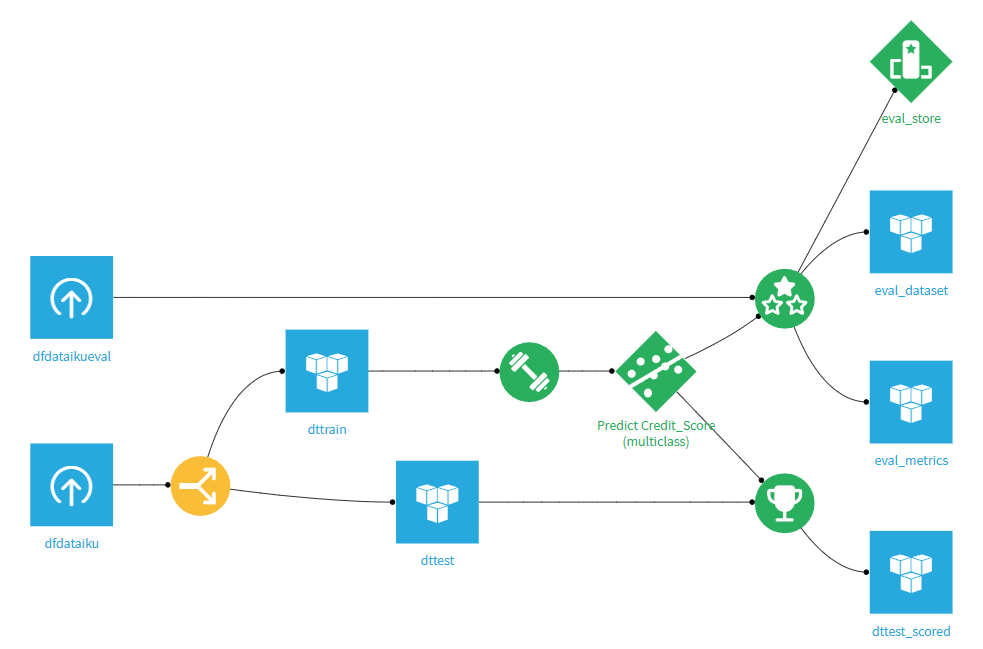

    Performance metrics

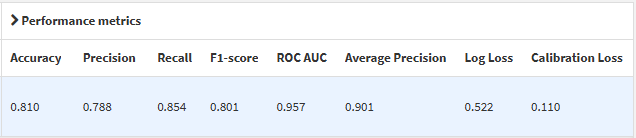

    Analyse on correct prediction

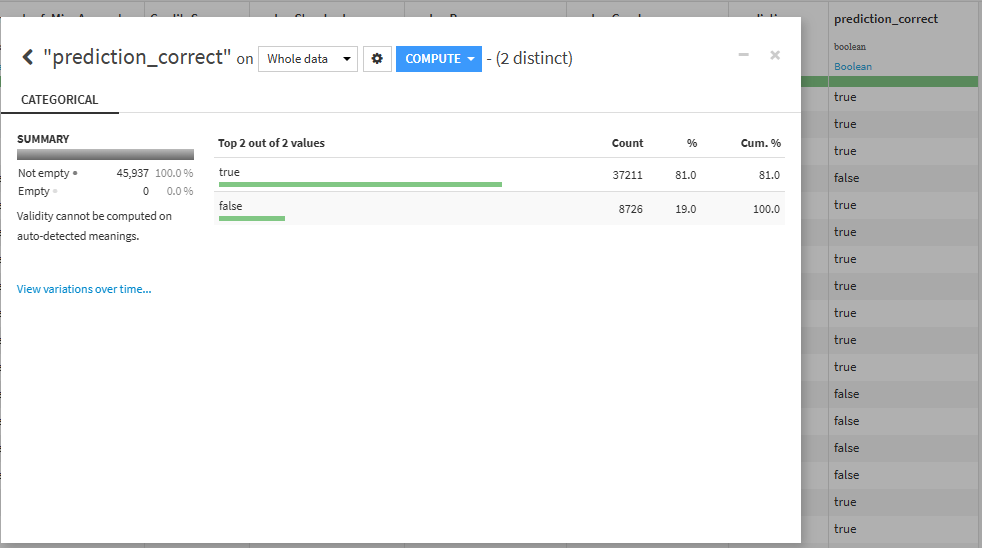